## Basics of Probability for Data Science

In [5]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from itertools import permutations

from statsmodels.stats import weightstats

#### Study links:
https://www.analyticsvidhya.com/blog/2017/02/basic-probability-data-science-with-examples/

https://www.youtube.com/watch?v=_0tr8Iw0tjA

https://scipy-lectures.org/packages/statistics/index.html

http://web.stanford.edu/class/archive/cs/cs109/cs109.1192/handouts/pythonForProbability.html

### Normal Distribution

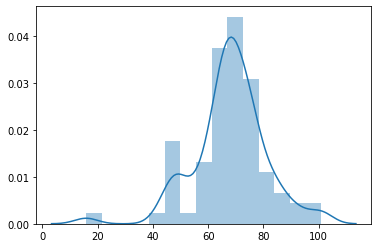

In [124]:
sns.distplot(stats.norm.rvs(loc = 67,scale= 13.7,size=80))

0.1713344378202477

### Binomial Distribution:

#### Plotting distribution

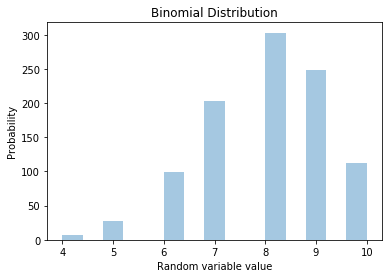

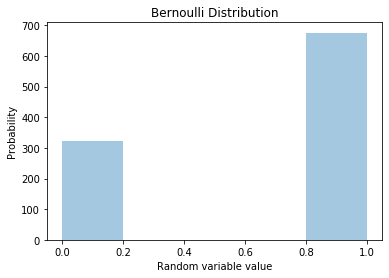

In [79]:
bi_data = stats.binom.rvs(n=10, p=0.8, size=1000)
sns.distplot(bi_data, kde=False)
plt.title("Binomial Distribution")
plt.ylabel('Probability')
plt.xlabel('Random variable value')
plt.show()

sns.distplot(stats.bernoulli.rvs(p=0.7, size=1000,), kde=False)
plt.title("Bernoulli Distribution")
plt.ylabel('Probability')
plt.xlabel('Random variable value')
plt.show()

In [98]:
def prob_of_success(prob_single,k_successes, n_trials):
    comb_count = len(list(combinations(np.arange(n_trials), k_successes)))
    return comb_count*pow(prob_single,k_successes)*pow((1 - prob_single),n_trials - k_successes)

Above function is already implemented in scipy.stats as "Probability mass function"

#### stats.binom.pmf(k,n,p) 
This gives the probability for value of RV being exact k.

#### stats.binom.cdf(k,n,p)
This gives the probability for value of RV being less than or equal to k.

#### Question 1:
Let’s say your football team is playing a series of 5 games against your opponent. Who ever wins more games (out of 5) wins the title.
Let us say, your team might is more skilled and has 75% chances of winning. So, there is a 25% chance of losing it.
What is the probability of you winning the series? Is it 75% or is it something else?
Let us find out. What are the possible scenarios in playing 5 games?
Ans : 
P(X=3) denotes the probability that you win 3 games. So, there are 5C3() =10 cases where you win 3 games. Hence probability = 10*0.75*0.75*0.75*0.25*0.25=0.264

In [102]:
print('Probability of winning the series is : ')
prob_of_success(0.75,3,5) + prob_of_success(0.75,4,5) + prob_of_success(0.75,5,5)

Probability of winning the series is : 


0.896484375

In [107]:
stats.binom.pmf(3,5,0.75,) + stats.binom.pmf(4,5,0.75,) + stats.binom.pmf(5,5,0.75,)

0.896484375

#### Question 2:
In an entrance examination there are twenty multiple choice questions. Each question has four options, and only one of them is correct. Find the probability of having seven or less than seven correct answers if a student attempts to answer every question at random.

In [106]:
# Probability of each question being correct is 
p = 0.25
# Number of trials
n = 20

# Find probability of having <= 7 correct answers
stats.binom.cdf(7,n,p)

0.8981881430772772

### Normal Distribution 
#### Question:
Let us assume that the test scores an entrance exam fits a normal distribution where the mean test score is 67, and the standard deviation is 13.7. Calculate the percentage of students scoring 80 or more in the exam?

In [127]:
# stats.norm.cdf(expected,mean,df)
1 - stats.norm.cdf(80,67,13.7)

0.1713344378202477

### Z - Test
Observed value = µ+zσ [µ is the mean and σ is the standard deviation]

In [58]:
arr1 =  [[20, 2, 7, 1, 34], [50, 12, 12, 34, 4]]
stats.zscore(arr1)

array([[-1., -1., -1., -1.,  1.],
       [ 1.,  1.,  1.,  1., -1.]])

### T - Test

T- Test :- A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features. It is mostly used when the data sets, like the set of data recorded as outcome from flipping a coin a 100 times, would follow a normal distribution and may have unknown variances. T test is used as a hypothesis testing tool, which allows testing of an assumption applicable to a population.
T-test has 2 types : 1. one sampled t-test 2. two-sampled t-test.

### One sampled t-test
The One Sample t Test determines whether the sample mean is statistically different from a known or hypothesised population mean. The One Sample t Test is a parametric test.

T-test is used when 
1. Poluplation standard deviation is unknown.
2. The sample size is small (<30)

#### Example:
you have 10 ages and you are checking whether avg age is 30 or not.

In [6]:
ages = [32, 34, 29,  29 ,22, 39, 38, 37, 38, 36, 30,26, 22, 22]

In [17]:
age_mean = np.mean(ages)
print('age mean : ', age_mean)

age mean :  31.0


In [21]:
tset, pvalue = stats.ttest_1samp(ages, 30)
print('pvalue : ', pvalue)

pvalue :  0.5605155888171379


In [22]:
if pvalue < 0.05:
    print('We are rejecting null hypothesis')
else:
    print('We are accepting null hypothesis')

We are accepting null hypothesis


#### Example 2:
It is recomended to walk 10000 steps a day to be healthy. You are wondaring if an average americans are meeting this recomendation. You survayed 10 random people about how many steps each of them takes every day on average and got the following responses:

7900, 8200, 11350, 10150, 8200, 9600, 6950, 6200, 8950, 8450

It's evident that within yur sample on average respondents are taking less thann 10000 steps. But can you infer the same for the whole population of America?


#### Answer:

H0: # of steps is at least meet i.e. mean >= 10000 <br>
H1: # of steps is not meet i.e. mean < 10000



In [52]:
observations = [7900, 8200, 11350, 10150, 8200, 9600, 6950, 6200, 8950, 8450]
tset, pvalue = stats.ttest_1samp(observations, 10000)

print('t value = ', tset)
print('p value = ', pvalue)

if pvalue < 0.05:
    print('We are rejecting null hypothesis')
else:
    print('We are accepting null hypothesis')

t value =  -2.9509275466009646
p value =  0.01619649937650771
We are rejecting null hypothesis


### Independent Samples t Test OR 2-sample test
The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test.

#### Example 1:
Auto manufacturere has two plants that produce same car. They are forced to close one of the plants. The company wants to know if there is significant difference in production between the two plants. Daily production over the same 10 days is as follows.


In [2]:
plantA = [1184, 1203, 1219, 1238, 1243, 1201, 1269, 1256, 1156, 1248]
plantB = [1146, 1178, 1212, 1193, 1226, 1154, 1230, 1222, 1161, 1148]

The question is which plant is better?

#### Answer

Lets find the means to make initital assumption about two plants.

In [7]:
mean_A = np.mean(plantA)
mean_B = np.mean(plantB)

"Plant A produces {diff} more cars per day than PlantB".format(diff = mean_A - mean_B)

'Plant A produces 34.700000000000045 more cars per day than PlantB'

Hence we can say that PlantA performs better than PlantB. The question is if 34 more cars enough to say that the plants are different?

We can make our hypothesis as follows:<br>
H0: PlantB is better than PlantA <br>
H1: PlantA is better than PlantB

In [14]:
tstat, pvalue = stats.ttest_ind(plantA, plantB)

print('t value = ', tstat)
print('p value = ', pvalue)

if pvalue < 0.05:
    print('We are rejecting null hypothesis')
else:
    print('We are accepting null hypothesis')

t value =  2.237178914364204
p value =  0.03816453413146129
We are rejecting null hypothesis


So we can conclude with 95% confidence that PlantA performs better than PlantB.

#### Example 2:

A company wants to determine if two sales department had statistically the same number of sales per week over the last 9 weeks. Perform t-test on the following results.

In [15]:
deptA = [40, 36, 42, 36, 35, 35, 41, 43, 34]
deptB = [43, 41, 44, 39, 37, 35, 44, 46, 40]

Lets find means to make our hypothesis.

In [19]:
mean_deptA = np.mean(deptA)
mean_deptB = np.mean(deptB)

'deptB makes {diff} more sales than deptB.'.format(diff=mean_deptB - mean_deptA)

'deptB makes 3.0 more sales than deptB.'

H0: DeptB is better than DeptA <br>
H1: DeptA is better than DeptB

In [22]:
tstat, pvalue = stats.ttest_ind(deptB,deptA)
print('t value = ', tstat)
print('p value = ', pvalue)

if pvalue < 0.05:
    print('We are rejecting null hypothesis')
else:
    print('We are accepting null hypothesis')

t value =  1.7999999999999998
p value =  0.09074323472091841
We are accepting null hypothesis


#### Z-Test
#### Example:
Your manager believes that color of store walls affects people's spending. Previously, your store had red interior color and customer were spending 57 on average with a std of 20. Now the walls are greeen and the mean spend of 80 curtomers you selected is $62. Has there been a significant (0.95 confidence) change in spend?

#### Answer:
H0: There is no significant change i.e. spending = 57 <br> 
H1: It has changed i.e. spending != 57

H0: It is not increased <br>
H1: It is increased

In [91]:
# As sample population is not given in problem lets create using CLT
mean = 57
std = 20
s_std = 20 / np.sqrt(80 - 1)
s_mean = mean

# tset, pvalue = weightstats.ztest(observations, value=mean)
z = (62 - mean) / s_std
pvalue = stats.norm.cdf(z)
# As we can see x_crit lies right and we need side of plot
pvalue = 1 - pvalue
print('z value = ', z)
print('p value = ', pvalue)



z value =  2.222048604328897
p value =  0.013140010532440849


In [92]:
# as we are dealing with two tailed problem we should compair pvalue with 5/2%
if pvalue < 0.05 / 2:
    print('We are rejecting null hypothesis')
else:
    print('We are accepting null hypothesis')

We are rejecting null hypothesis


### Correlation 
A new company decides to test sales of a new product in five seperate markets, to determine the best price point. They set a different price in each market and record sales volumes over 30 days period. Find the correlation coefficient.

In [23]:
prices = [10, 11, 15, 19, 22]
units_sold = [55, 57, 49, 48, 39]

In [38]:
np.corrcoef(prices, units_sold)

array([[ 1.        , -0.94776698],
       [-0.94776698,  1.        ]])

Correlation is -0.94

In [32]:
cor, _ = stats.pearsonr(prices,units_sold)

In [33]:
cor

-0.9477669811314406

### Covariance 

In [39]:
np.cov(prices, units_sold)

array([[ 26.3, -34.3],
       [-34.3,  49.8]])

Covariance is -34.3

### ANOVA - Analysis of variance 

#### Problem:

In effort to receive faster payment of invoices, a company introduced two discounts plans. One set of customer is given a 2% discount if they pay their invoice early. Another group is offered a 1% discount. And third set is not offered any incentive. The results are as follows: <br>
It shows number of days it take to get payment.<br>
Using ANOVA can we say that the offers result in faster payment.

In [40]:
disc_2 = [11, 16, 9, 14, 10]
disc_1 = [21, 15, 23,10, 16]
no_disc= [14,11, 18, 16, 21]